In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Importing all necessary libraries

In [4]:
import sys
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [5]:
# Importing our data from IBM object storage

my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

## Pre-processing
### I declared our variables as the following;

X = Feature Matrix, y = response vector

In [11]:
X = my_data[['Age','Sex','BP','Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

I also created labels for the data so we can still evaluate categorical data to form our Decision Tree

In [12]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [13]:
y = my_data['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

With the variables established, I set up the Decision Tree to determine which drug would be the best option

In [14]:
# I used train/test split to establish the testing dataset and the training dataset 

from sklearn.model_selection import train_test_split

In [15]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
# Making sure that the dimensions match

print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)
Shape of X testing set (60, 5) &  Size of Y testing set (60,)


In [19]:
# To model, I made an instance of the DecisionTreeClassifier and called it drugTree - I selected 'entropy' because I wanted to be able to see the information gain of each node of the tree

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
# Then I trained the model using the training sets

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
# I made predictions on the testing dataset and stored it in the variable call pTree

pTree = drugTree.predict(X_testset)

In [22]:
# Looking at a visual comparison of our model's prediction versus the actual data

print (pTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [23]:
# I used metrics from sklearn to see how accurate the model ended up being

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, pTree))

DecisionTrees's Accuracy:  0.9833333333333333


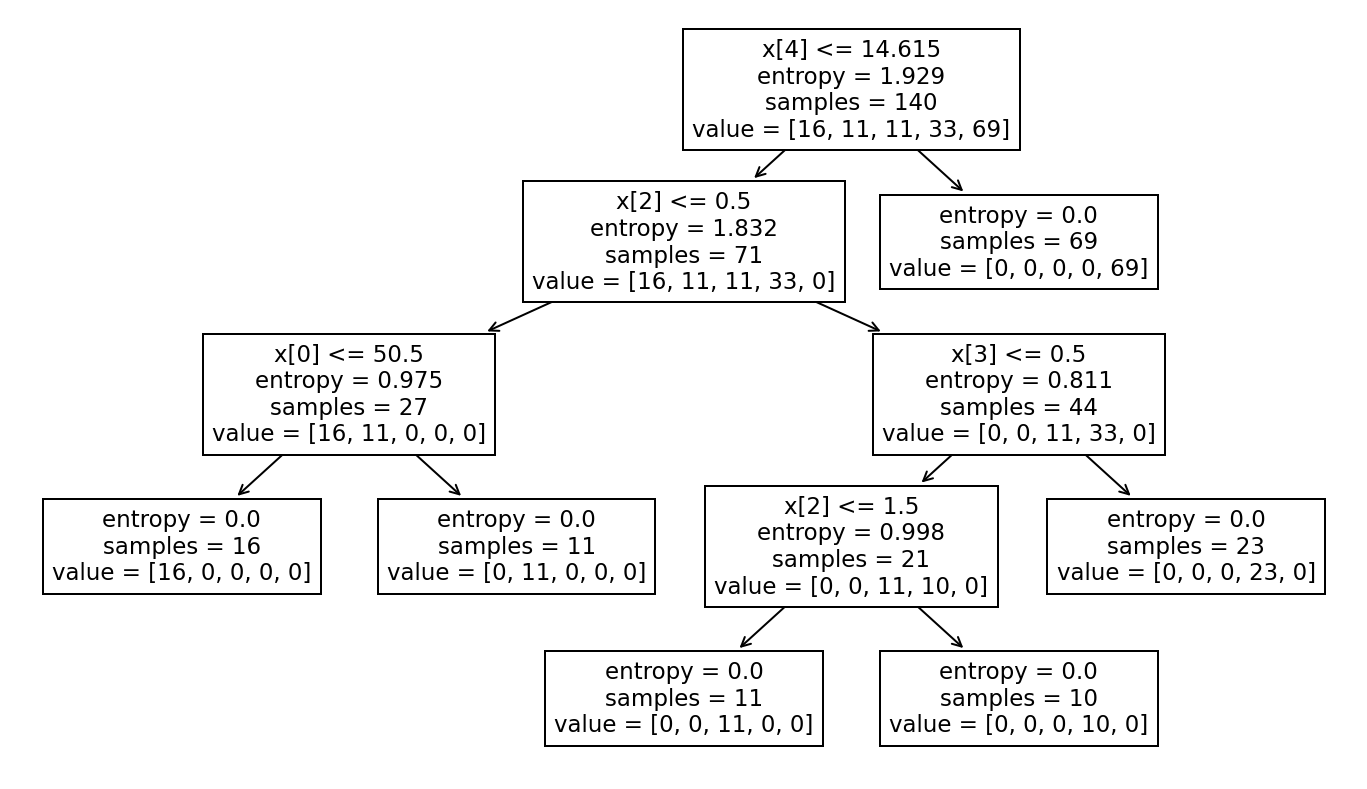

In [26]:
# Lastly, I visualized the newly created Decision Tree

tree.plot_tree(drugTree)
plt.show()